# Restaurants around Georgia Tech, Atlanta

*Venkatavaradan Sunderarajan*

## Introduction/Business Problem - *week 4 submission*

Georgia Institute of Technology is a public institution that was founded in 1885. It has a total student enrollment of of over 32,000. The campus is spread over about 400 acres in the heart of Atlanta. This provides an ideal setting of loyal customers in search of diverse and trending food options in and around the locality. 

Despite availability of numerous options, students are often bored of existing options and are in constant lookout for new, affordable and healthy eating options around campus. The constantly evolving tastes and diversity of student population facilitates a great opportunity for restaurants to open in this area.

This project will focus on:
1. Mapping existing dining locations in and around GT campus
2. Classifying them based on cuisine, distance, popularity
3. Identifying oppportunities for new restaurants and/or cafes.

The target audience is active entrepreneurs in the catering and food industry looking for opportunities to serve a young and diverse student population.

## Data - *week 4 submission*

The data for this study will be primarily obtained from FourSquare API. The location of restaurants, cafes as well as dining options listed under the popular spots will be studied. Appropriate consideration for user ratings, distance to campus and classifications based on cuisine, pricing and store timings will prove effective in identifying gaps in the existing availability.


--- **End of week 4 submission** ---

---

## Code

In [1]:
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Location and API access setup

In [2]:
address = 'Georgia Tech'

geolocator = Nominatim(user_agent="gt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Georgia Tech are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Georgia Tech are 33.776033, -84.39884086001581.


In [3]:
CLIENT_ID = 'AISHYS45K1UNBO4BMDGMKGWQVNVNXBPKEAQEM4FCQEW2DEW1' # your Foursquare ID
CLIENT_SECRET = '04LIUNELIOIHAOU3V1XC3GFRRS1LGBJ1MFESWONURQVC3SI2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Restaurants

In [4]:
LIMIT = 50
radius = 5000 #5km - 3 miles approx.
search_query = 'restaurant'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb31a1a0cc1fd001ba7a7e3'},
 'response': {'venues': [{'id': '4a9b0603f964a5200c3420e3',
    'name': 'Livingston Restaurant+Bar',
    'location': {'address': '659 Peachtree St NE',
     'crossStreet': 'at Ponce de Leon Ave.',
     'lat': 33.77258,
     'lng': -84.3844699,
     'labeledLatLngs': [{'label': 'display',
       'lat': 33.77258,
       'lng': -84.3844699}],
     'distance': 1384,
     'postalCode': '30308',
     'cc': 'US',
     'city': 'Atlanta',
     'state': 'GA',
     'country': 'United States',
     'formattedAddress': ['659 Peachtree St NE (at Ponce de Leon Ave.)',
      'Atlanta, GA 30308',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d157941735',
      'name': 'New American Restaurant',
      'pluralName': 'New American Restaurants',
      'shortName': 'New American',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/newamerican_',
       'suffix': '.png'},
      'primary': True}],
    'venu

In [5]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df1 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df1['categories'] = df1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df1.columns = [column.split('.')[-1] for column in df1.columns]

df1.head()

/Users/venkat/opt/anaconda3/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


name               categories  \
0        Livingston Restaurant+Bar  New American Restaurant   
1        ENO Restaurant & Wine Bar                      Bar   
2                  IKEA Restaurant  Scandinavian Restaurant   
3        Dua Vietnamese Restaurant             Noodle House   
4  Sun Dial Restaurant, Bar & View                Hotel Bar   

               address                     crossStreet        lat        lng  \
0  659 Peachtree St NE           at Ponce de Leon Ave.  33.772580 -84.384470   
1  800 Peachtree St NE           Peachtree St & 5th St  33.776745 -84.385253   
2       441 16th St NW  btwn Northside Dr & Village St  33.788580 -84.404743   
3       77 12th Street                             NaN  33.784350 -84.384584   
4  210 Peachtree St NW   top of Westin Peachtree Plaza  33.759478 -84.388580   

                                      labeledLatLngs  distance postalCode  cc  \
0  [{'label': 'display', 'lat': 33.77258, 'lng': ...      1384      30308  US   
1  [{'label': 'display', 'lat': 33.776745, 'lng':...      1259      30308  US   
2  [{'label': 'display', 'lat': 33.78857999005225...      1499      30363  US   
3  [{'label': 'display', 'lat': 33.78435031583218...      1611      30309  US   
4  [{'label': 'display', 'lat': 33.75947803596591...      2073      30303  US   

      city state        country  \
0  Atlanta    GA  United States   
1  Atlanta    GA  United States   
2  Atlanta    GA  United States   
3  Atlanta    GA  United States   
4  Atlanta    GA  United States   

                                    formattedAddress      neighborhood  \
0  [659 Peachtree St NE (at Ponce de Leon Ave.), ...               NaN   
1  [800 Peachtree St NE (Peachtree St & 5th St), ...               NaN   
2  [441 16th St NW (btwn Northside Dr & Village S...  Atlantic Station   
3  [77 12th Street, Atlanta, GA 30309, United Sta...               NaN   
4  [210 Peachtree St NW (top of Westin Peachtree ...               NaN   

                         id  
0  4a9b0603f964a5200c3420e3  
1  4a70f2f4f964a520dbd81fe3  
2  4b7d80dff964a520d5c22fe3  
3  5ba91ede029a55003928d9c5  
4  4a4d3521f964a520b4ad1fe3

In [6]:
df1.shape

(50, 16)

In [7]:
# Map with Restaurants around GT
map_gt = folium.Map(location=[latitude, longitude], zoom_start=14)

from folium import plugins

# instantiate a mark cluster object for the incidents in the dataframe
venues = plugins.MarkerCluster().add_to(map_gt)

# add GT as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=8,
    popup='Georgia Tech',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(map_gt)

# add circle of interest
folium.Circle([latitude, longitude], 
              radius=5000, popup=None, 
              tooltip=None, 
              color = 'black', 
              fill = 'False'
             ).add_to(map_gt)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df1['lat'], df1['lng'], df1['name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(venues)
    
map_gt

_**Observations:**_
1. A majority of the restaurants are found on the east side of GT campus
2. A few of them are spread out to the north and one to the west side.
3. The majority of restaurants to the south of campus are in the downtown area.
4. This list however doesn't represent all the dining options. Keyword search terms need to be expanded.

### Cafes

In [8]:
search_query2 = 'cafe'

url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query2, radius, LIMIT)

results2 = requests.get(url2).json()
results2

{'meta': {'code': 200, 'requestId': '5eb31aa6c94979001b00a763'},
 'response': {'venues': [{'id': '571faadc498edeb802c18551',
    'name': 'Yetu cafe coca-cola',
    'location': {'lat': 33.77053589238719,
     'lng': -84.39671564552658,
     'labeledLatLngs': [{'label': 'display',
       'lat': 33.77053589238719,
       'lng': -84.39671564552658}],
     'distance': 642,
     'cc': 'US',
     'city': 'Atlanta',
     'state': 'GA',
     'country': 'United States',
     'formattedAddress': ['Atlanta, GA', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d16d941735',
      'name': 'Café',
      'pluralName': 'Cafés',
      'shortName': 'Café',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1588796097',
    'hasPerk': False},
   {'id': '5470989c498e14e5b760dfd2',
    'name': 'Sweet Hut Bakery & Cafe',
    'location': {'address': '933 Peachtree St NE #935',
     'crossStreet': 'Ste

In [9]:
# assign relevant part of JSON to venues
venues2 = results2['response']['venues']

# tranform venues into a dataframe
dataframe2 = json_normalize(venues2)
dataframe2.head()

/Users/venkat/opt/anaconda3/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


id                     name  \
0  571faadc498edeb802c18551      Yetu cafe coca-cola   
1  5470989c498e14e5b760dfd2  Sweet Hut Bakery & Cafe   
2  4c7f94b2a7958cfa5203912b              Cafe Xpress   
3  5150da09e4b0405d179930f9          Café Intermezzo   
4  594d406231fd145b63bdc58b   Tropical Smoothie Cafe   

                                          categories    referralId  hasPerk  \
0  [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...  v-1588796097    False   
1  [{'id': '4bf58dd8d48988d16a941735', 'name': 'B...  v-1588796097    False   
2  [{'id': '4bf58dd8d48988d14e941735', 'name': 'A...  v-1588796097    False   
3  [{'id': '4bf58dd8d48988d16d941735', 'name': 'C...  v-1588796097    False   
4  [{'id': '52f2ab2ebcbc57f1066b8b41', 'name': 'S...  v-1588796097    False   

   location.lat  location.lng  \
0     33.770536    -84.396716   
1     33.780315    -84.384100   
2     33.773480    -84.387198   
3     33.783136    -84.383470   
4     33.779940    -84.389177   

                             location.labeledLatLngs  location.distance  \
0  [{'label': 'display', 'lat': 33.77053589238719...                642   
1  [{'label': 'display', 'lat': 33.78031538406412...               1444   
2  [{'label': 'display', 'lat': 33.77347992603982...               1114   
3  [{'label': 'display', 'lat': 33.7831363243104,...               1627   
4  [{'label': 'display', 'lat': 33.77994013745307...                994   

  location.cc  ...     location.crossStreet location.postalCode delivery.id  \
0          US  ...                      NaN                 NaN         NaN   
1          US  ...                  Ste 935               30309      310613   
2          US  ...  at Ponce De Leon Ave NE               30308         NaN   
3          US  ...              11th Street               30309     1489485   
4          US  ...                      NaN               30309     1170064   

                                        delivery.url delivery.provider.name  \
0                                                NaN                    NaN   
1  https://www.grubhub.com/restaurant/sweet-hut-b...                grubhub   
2                                                NaN                    NaN   
3  https://www.grubhub.com/restaurant/cafe-interm...                grubhub   
4  https://www.grubhub.com/restaurant/tropical-sm...                grubhub   

              delivery.provider.icon.prefix delivery.provider.icon.sizes  \
0                                       NaN                          NaN   
1  https://fastly.4sqi.net/img/general/cap/                     [40, 50]   
2                                       NaN                          NaN   
3  https://fastly.4sqi.net/img/general/cap/                     [40, 50]   
4  https://fastly.4sqi.net/img/general/cap/                     [40, 50]   

               delivery.provider.icon.name venuePage.id location.neighborhood  
0                                      NaN          NaN                   NaN  
1  /delivery_provider_grubhub_20180129.png    119303101                   NaN  
2                                      NaN          NaN                   NaN  
3  /delivery_provider_grubhub_20180129.png     77751697                   NaN  
4  /delivery_provider_grubhub_20180129.png          NaN                   NaN  

[5 rows x 25 columns]

In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
df2 = dataframe2.loc[:, filtered_columns2]

# filter the category for each row
df2['categories'] = df2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df2.columns = [column.split('.')[-1] for column in df2.columns]

df2

name  \
0                                 Yetu cafe coca-cola   
1                             Sweet Hut Bakery & Cafe   
2                                         Cafe Xpress   
3                                     Café Intermezzo   
4                              Tropical Smoothie Cafe   
5                              Baraonda Cafe Italiano   
6                                        Cafe Aquaria   
7                                      Micheal's Cafe   
8   Cafe Of Life Atlanta - Chiropractic & Wellness...   
9                              Carolyn's Gourmet Cafe   
10                            The Flying Biscuit Cafe   
11                            The Cafe (@ The Westin)   
12                                      Busy Bee Cafe   
13                             Hard Rock Cafe Atlanta   
14                                         Cafe Spice   
15                                   Cafe Hot Wing 11   
16                                     Cafe Hortensia   
17                               Atlantic Corner Cafe   
18                                ASAP+ Commuter Cafe   
19                                          Cafe Casa   
20                                       Kameels Cafe   
21                                      Galloway Cafe   
22                            Ginseng Chinese Cafe II   
23                      Anatolia Cafe & Hookah Lounge   
24                                           H2O Cafe   
25                                 Coca-Cola CCP Cafe   
26                                    City Limit Cafe   
27                       The Colony Bistro & Lab Cafe   
28                                     Murrell's Cafe   
29                                       Cafe M Rouge   
30                                            Café 67   
31                                   Metro Cafe Diner   
32                            Cafe Sunflower Buckhead   
33                                      Acoustic Cafe   
34                                          Momo Cafe   
35                                   Savory Fare Cafe   
36                                       Cafe Kia-Ora   
37                             Café 458 Sunday Brunch   
38                                         Cafe Agora   
39                                            Cafe 10   
40                                   Daily Bread cafe   
41                                     Red Light Café   
42                                      Atlantic Cafe   
43                                            Cafe 49   
44                                           Cafe Jas   
45        Callan Café at Callanwolde Fine Arts Center   
46                                       Midcity Cafe   
47                                 Atwoods Pizza Cafe   
48                             Flavours Curbside Cafe   
49                        Cafe of Life - Chiropractic   

                         categories        lat        lng  \
0                              Café  33.770536 -84.396716   
1                            Bakery  33.780315 -84.384100   
2               American Restaurant  33.773480 -84.387198   
3                              Café  33.783136 -84.383470   
4                     Smoothie Shop  33.779940 -84.389177   
5                Italian Restaurant  33.773785 -84.384856   
6                         Cafeteria  33.763176 -84.394875   
7               American Restaurant  33.785218 -84.390473   
8                      Chiropractor  33.782357 -84.380625   
9                    Sandwich Place  33.786343 -84.387721   
10                   Breakfast Spot  33.781880 -84.380340   
11                   Breakfast Spot  33.759490 -84.387661   
12  Southern / Soul Food Restaurant  33.754577 -84.414024   
13                 Theme Restaurant  33.759816 -84.387450   
14                Indian Restaurant  33.773654 -84.398153   
15                      Wings Joint  33.755314 -84.389038   
16                             Café  33.756182 -84.389939   
17                             Café  33.791

In [11]:
df2.head()

name           categories        lat        lng  \
0      Yetu cafe coca-cola                 Café  33.770536 -84.396716   
1  Sweet Hut Bakery & Cafe               Bakery  33.780315 -84.384100   
2              Cafe Xpress  American Restaurant  33.773480 -84.387198   
3          Café Intermezzo                 Café  33.783136 -84.383470   
4   Tropical Smoothie Cafe        Smoothie Shop  33.779940 -84.389177   

                                      labeledLatLngs  distance  cc     city  \
0  [{'label': 'display', 'lat': 33.77053589238719...       642  US  Atlanta   
1  [{'label': 'display', 'lat': 33.78031538406412...      1444  US  Atlanta   
2  [{'label': 'display', 'lat': 33.77347992603982...      1114  US  Atlanta   
3  [{'label': 'display', 'lat': 33.7831363243104,...      1627  US  Atlanta   
4  [{'label': 'display', 'lat': 33.77994013745307...       994  US  Atlanta   

  state        country                                   formattedAddress  \
0    GA  United States                       [Atlanta, GA, United States]   
1    GA  United States  [933 Peachtree St NE #935 (Ste 935), Atlanta, ...   
2    GA  United States  [675 W Peachtree St NE (at Ponce De Leon Ave N...   
3    GA  United States  [1065 Peachtree St NE Ste 2 (11th Street), Atl...   
4    GA  United States  [930 Spring St NW # 1, Atlanta, GA 30309, Unit...   

                      address              crossStreet postalCode  \
0                         NaN                      NaN        NaN   
1    933 Peachtree St NE #935                  Ste 935      30309   
2       675 W Peachtree St NE  at Ponce De Leon Ave NE      30308   
3  1065 Peachtree St NE Ste 2              11th Street      30309   
4        930 Spring St NW # 1                      NaN      30309   

  neighborhood                        id  
0          NaN  571faadc498edeb802c18551  
1          NaN  5470989c498e14e5b760dfd2  
2          NaN  4c7f94b2a7958cfa5203912b  
3          NaN  5150da09e4b0405d179930f9  
4          NaN  594d406231fd145b63bdc58b

In [12]:
df2.shape

(50, 16)

In [13]:
for lat, lng, label, in zip(df2['lat'], df2['lng'], df2['name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(venues)

In [14]:
map_gt

In [15]:
df = df1.append(df2)

_**Observations:**_
1. Addition of cafes to the dataset provides further insight.
2. Midtown location, to the east of campus is a hotspot for eateries.
3. Dining options to the west and north are relatively lower in comparison.
4. There are additional possible venues not yet captured in data, hence places of interest can be explored.

### Places of interest

In [16]:
#popular spots - explore
LIMIT = 200
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
explore = requests.get(url).json()
expitems = explore['response']['groups'][0]['items']

In [17]:
dfexp = json_normalize(expitems) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dfexp.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dfexp.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/Users/venkat/opt/anaconda3/envs/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


name             categories  \
0      Spoiled Opulence Salon     Salon / Barbershop   
1           Sublime Doughnuts             Donut Shop   
2     Antico Pizza Napoletana            Pizza Place   
3                      Le Fat  Vietnamese Restaurant   
4    Gio's Chicken Amalfitano     Italian Restaurant   
5             The Fox Theatre                Theater   
6           Mac's Beer & Wine           Liquor Store   
7                The Optimist     Seafood Restaurant   
8  Hop City Craft Beer & Wine             Beer Store   
9           Technology Square                  Plaza   

                       address                           crossStreet  \
0           948 Marietta St NW  business level of Mst Lofts and apts   
1               535 10th St NW                       Hemphill Ave NW   
2         1093 Hemphill Ave NW                        at Ethel St NW   
3     935 Marietta St NW Ste A                                   NaN   
4         1099 Hemphill Ave NW                                   NaN   
5          660 Peachtree St NE               at Ponce de Leon Ave NE   
6           21 Peachtree Pl NW                                   NaN   
7        914 Howell Mill Rd NW                             9th St NW   
8  1000 Marietta St NW Ste 302                        Howell Mill Rd   
9                     Fifth St                             Spring St   

         lat        lng                                     labeledLatLngs  \
0  33.776506 -84.407723  [{'label': 'display', 'lat': 33.77650550942289...   
1  33.781734 -84.404930  [{'label': 'display', 'lat': 33.78173438223933...   
2  33.784637 -84.405590  [{'label': 'display', 'lat': 33.784637, 'lng':...   
3  33.778169 -84.409113  [{'label': 'display', 'lat': 33.77816916096096...   
4  33.784875 -84.405933  [{'label': 'display', 'lat': 33.78487453102762...   
5  33.772526 -84.385911  [{'label': 'display', 'lat': 33.77252634458606...   
6  33.780916 -84.387992  [{'label': 'display', 'lat': 33.780916, 'lng':...   
7  33.779892 -84.410597  [{'label': 'display', 'lat': 33.77989164441703...   
8  33.779055 -84.410701  [{'label': 'display', 'lat': 33.7790547005599,...   
9  33.776349 -84.387354  [{'label': 'display', 'lat': 33.77634928657157...   

   distance postalCode  cc     city state        country  \
0       823      30318  US  Atlanta    GA  United States   
1       848      30318  US  Atlanta    GA  United States   
2      1143      30318  US  Atlanta    GA  United States   
3       979      30318  US  Atlanta    GA  United States   
4      1182      30318  US  Atlanta    GA  United States   
5      1258      30308  US  Atlanta    GA  United States   
6      1141      30309  US  Atlanta    GA  United States   
7      1169      30318  US  Atlanta    GA  United States   
8      1147      30318  US  Atlanta    GA  United States   
9      1063      30309  US  Atlanta    GA  United States   

                                    formattedAddress            neighborhood  \
0  [948 Marietta St NW (business level of Mst Lof...                     NaN   
1  [535 10th St NW (Hemphill Ave NW), Atlanta, GA...                     NaN   
2  [1093 Hemphill Ave NW (at Ethel St NW), Atlant...                 Westsid   
3  [935 Marietta St NW Ste A, Atlanta, GA 30318, ...                     NaN   
4  [1099 Hemphill Ave NW, Atlanta, GA 30318, Unit...                  Westsi   
5  [660 Peachtree St NE (at Ponce de Leon Ave NE)...                     NaN   
6  [21 Peachtree Pl NW, Atlanta, GA 30309, United...                     NaN   
7  [914 Howell Mill Rd NW (9th St NW), Atlanta, G...                     NaN   
8  [1000 Marietta St NW Ste 302 (Howell Mill Rd),...  Marietta Street Artery   
9  [Fifth St (Spring St), Atlanta, GA 30309, Unit...                     NaN   

                         id  
0  4c7fc85cd860b60c9fdc619d  
1  49ef540df964a5209d681fe3  
2  4ac29836f964a520e79920e3  
3  5398bbb9498ea14ee535bd8f  
4  50beb1d1e4b05b9d6a7528e9  
5  49e3b8d8f964a520bb621fe3  
6  4

In [18]:
dfcats = dataframe_filtered.groupby(['categories']).count()
catslist = dfcats.index

In [19]:
catslist

Index(['American Restaurant', 'Animal Shelter', 'Aquarium', 'Art Museum',
       'Asian Restaurant', 'Bakery', 'Bar', 'Basketball Stadium', 'Beer Store',
       'Botanical Garden', 'Breakfast Spot', 'Brewery', 'Bridge',
       'Burger Joint', 'Burrito Place', 'Café', 'Coffee Shop', 'Concert Hall',
       'Cuban Restaurant', 'Dive Bar', 'Dog Run', 'Donut Shop',
       'Farmers Market', 'Fast Food Restaurant', 'Field', 'Football Stadium',
       'Gastropub', 'Golf Course', 'Gourmet Shop', 'Grocery Store', 'Gun Shop',
       'Gym', 'Gym / Fitness Center', 'Historic Site', 'History Museum',
       'Hotel', 'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Juice Bar', 'Korean Restaurant', 'Liquor Store',
       'Market', 'Mediterranean Restaurant', 'Mexican Restaurant',
       'Monument / Landmark', 'Music Venue', 'New American Restaurant',
       'Outdoor Sculpture', 'Park', 'Performing Arts Venue', 'Pet Store',
       'Pizza Place', 'Plaza', 'Poke

In [20]:
filterlist = ['Asian Restaurant', 'Bakery', 'Bar', 'Breakfast Spot', 'Brewery', 'Burger Joint', 'Burrito Place', 'Café', 'Coffee Shop', 'Cuban Restaurant', 'Dive Bar', 'Donut Shop', 'Fast Food Restaurant', 'Gastropub', 'Gourmet Shop', 'Ice Cream Shop', 'Indian Restaurant', 'Italian Restaurant','Japanese Restaurant', 'Juice Bar', 'Korean Restaurant','Mediterranean Restaurant', 'Mexican Restaurant','New American Restaurant','Pizza Place', 'Salad Place','Sandwich Place', 'Seafood Restaurant', 'Soup Place', 'Southern / Soul Food Restaurant', 'Spanish Restaurant','Steakhouse', 'Taco Place', 'Tapas Restaurant', 'Vietnamese Restaurant']

In [21]:
df3 = dataframe_filtered[dataframe_filtered.categories.isin(filterlist)]

In [22]:
df3.head()

name             categories                   address  \
1         Sublime Doughnuts             Donut Shop            535 10th St NW   
2   Antico Pizza Napoletana            Pizza Place      1093 Hemphill Ave NW   
3                    Le Fat  Vietnamese Restaurant  935 Marietta St NW Ste A   
4  Gio's Chicken Amalfitano     Italian Restaurant      1099 Hemphill Ave NW   
7              The Optimist     Seafood Restaurant     914 Howell Mill Rd NW   

       crossStreet        lat        lng  \
1  Hemphill Ave NW  33.781734 -84.404930   
2   at Ethel St NW  33.784637 -84.405590   
3              NaN  33.778169 -84.409113   
4              NaN  33.784875 -84.405933   
7        9th St NW  33.779892 -84.410597   

                                      labeledLatLngs  distance postalCode  cc  \
1  [{'label': 'display', 'lat': 33.78173438223933...       848      30318  US   
2  [{'label': 'display', 'lat': 33.784637, 'lng':...      1143      30318  US   
3  [{'label': 'display', 'lat': 33.77816916096096...       979      30318  US   
4  [{'label': 'display', 'lat': 33.78487453102762...      1182      30318  US   
7  [{'label': 'display', 'lat': 33.77989164441703...      1169      30318  US   

      city state        country  \
1  Atlanta    GA  United States   
2  Atlanta    GA  United States   
3  Atlanta    GA  United States   
4  Atlanta    GA  United States   
7  Atlanta    GA  United States   

                                    formattedAddress neighborhood  \
1  [535 10th St NW (Hemphill Ave NW), Atlanta, GA...          NaN   
2  [1093 Hemphill Ave NW (at Ethel St NW), Atlant...      Westsid   
3  [935 Marietta St NW Ste A, Atlanta, GA 30318, ...          NaN   
4  [1099 Hemphill Ave NW, Atlanta, GA 30318, Unit...       Westsi   
7  [914 Howell Mill Rd NW (9th St NW), Atlanta, G...          NaN   

                         id  
1  49ef540df964a5209d681fe3  
2  4ac29836f964a520e79920e3  
3  5398bbb9498ea14ee535bd8f  
4  50beb1d1e4b05b9d6a7528e9  
7  4fac2453754afeecdf45c944

In [23]:
df3.shape

(49, 16)

In [24]:
for lat, lng, label, in zip(df3['lat'], df3['lng'], df3['name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(venues)
    
# display map
map_gt

In [25]:
df = df.append(df3)

_**Observations:**_
1. It is now observed that dining venues to the north of campus are aplenty, despite not being classified so in the API queries.
2. There exists a wide range of options, the classifications of which would be crucial to understand the current situation.

### Data Cleansing and Sorting

In [26]:
df.shape

(149, 16)

In [27]:
df = df.drop_duplicates(subset='id', keep = 'first')

df = df.drop(['labeledLatLngs', 'cc','city','state','country','formattedAddress','crossStreet', 'neighborhood'],axis = 1)

df.drop(df[df['name'].astype(str).str.contains('Equipment')].index, axis = 0, inplace = True)

df.drop(df[df['name'].astype(str).str.contains('Depot')].index, axis = 0, inplace = True)

df.drop(df[df['name'].astype(str).str.contains('Chiropractic')].index, axis = 0, inplace = True)

df.sort_values(by='categories', inplace = True)

df.reset_index(inplace=True, drop = True)

The dataset is exported to a CSV to perform housekeeping and ensuring garbage data isn't encountered.

A "cuisine" column comprising relevant information is added for further insights.

In [31]:
df.to_csv('df.csv')

In [32]:
df = pd.read_csv('df.csv')

In [33]:
df.head()

Unnamed: 0                       name           categories   cuisine  \
0           0                Cafe Xpress  American Restaurant  American   
1           1            Vibe Restaurant  American Restaurant  American   
2           2         Simon's Restaurant  American Restaurant  American   
3           3  Truth Restaurant & Lounge  American Restaurant  American   
4           4         Collage Restaurant  American Restaurant  American   

                 address        lat        lng  distance  postalCode  \
0  675 W Peachtree St NE  33.773480 -84.387198      1114       30308   
1  400 W Peachtree St NW  33.764703 -84.388364      1590       30308   
2      793 Juniper St NE  33.776149 -84.382603      1502       30308   
3   1100 Crescent Ave NE  33.785033 -84.384441      1666       30309   
4    165 Courtland St NE  33.759306 -84.383891      2319       30303   

                         id  
0  4c7f94b2a7958cfa5203912b  
1  53938464498ee0e5e0bd8fc5  
2  59b3066b791871507c821064  
3  5a8f33e5aa6c9501447d973e  
4  5786458f498e8ddd7a666d21

In [34]:
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace=True)

In [35]:
df.head()

name           categories   cuisine  \
0                Cafe Xpress  American Restaurant  American   
1            Vibe Restaurant  American Restaurant  American   
2         Simon's Restaurant  American Restaurant  American   
3  Truth Restaurant & Lounge  American Restaurant  American   
4         Collage Restaurant  American Restaurant  American   

                 address        lat        lng  distance  postalCode  \
0  675 W Peachtree St NE  33.773480 -84.387198      1114       30308   
1  400 W Peachtree St NW  33.764703 -84.388364      1590       30308   
2      793 Juniper St NE  33.776149 -84.382603      1502       30308   
3   1100 Crescent Ave NE  33.785033 -84.384441      1666       30309   
4    165 Courtland St NE  33.759306 -84.383891      2319       30303   

                         id  
0  4c7f94b2a7958cfa5203912b  
1  53938464498ee0e5e0bd8fc5  
2  59b3066b791871507c821064  
3  5a8f33e5aa6c9501447d973e  
4  5786458f498e8ddd7a666d21

In [36]:
#Find mean distances of locations
meandf = df.groupby(by = 'postalCode', as_index=True, sort=True).mean()

meandf.rename(columns={"distance": "Avg_Dist"}, inplace=True)

meandf

lat        lng     Avg_Dist
postalCode                                   
30066       33.775111 -84.405378   613.000000
30071       33.816470 -84.389963  4575.000000
30301       33.771016 -84.398124   562.000000
30303       33.758130 -84.386607  2317.789474
30305       33.818412 -84.381156  4993.000000
30306       33.785468 -84.361591  3632.000000
30308       33.772658 -84.383830  1541.709677
30309       33.785303 -84.386091  1825.750000
30312       33.750883 -84.377045  3496.000000
30313       33.765892 -84.394457  1382.000000
30314       33.754291 -84.411748  2706.500000
30315       33.736729 -84.395640  4385.000000
30318       33.785068 -84.409562  1527.464286
30324       33.810764 -84.361743  5177.666667
30332       33.775043 -84.399277   324.000000
30363       33.791586 -84.399646  1770.000000

In [37]:
#Find no. of locations
countdf = df.groupby(by = 'postalCode', as_index=True, sort=True).count()

countdf.drop(['categories', 'cuisine','address','lat','lng','distance','id'], axis = 1, inplace = True)

countdf.rename(columns={"name": "Total"}, inplace=True)

countdf

Total
postalCode       
30066           1
30071           1
30301           1
30303          19
30305           1
30306           2
30308          31
30309          28
30312           2
30313           4
30314           2
30315           1
30318          28
30324           3
30332           3
30363           3

In [38]:
cuisine = df.groupby(by = 'cuisine', as_index=True, sort=True).count()

In [39]:
summarydf = meandf.merge(countdf, on=['postalCode'], how='left')

In [41]:
summarydf = summarydf.sort_values('Avg_Dist', ascending = True)
summarydf

lat        lng     Avg_Dist  Total
postalCode                                          
30332       33.775043 -84.399277   324.000000      3
30301       33.771016 -84.398124   562.000000      1
30066       33.775111 -84.405378   613.000000      1
30313       33.765892 -84.394457  1382.000000      4
30318       33.785068 -84.409562  1527.464286     28
30308       33.772658 -84.383830  1541.709677     31
30363       33.791586 -84.399646  1770.000000      3
30309       33.785303 -84.386091  1825.750000     28
30303       33.758130 -84.386607  2317.789474     19
30314       33.754291 -84.411748  2706.500000      2
30312       33.750883 -84.377045  3496.000000      2
30306       33.785468 -84.361591  3632.000000      2
30315       33.736729 -84.395640  4385.000000      1
30071       33.816470 -84.389963  4575.000000      1
30305       33.818412 -84.381156  4993.000000      1
30324       33.810764 -84.361743  5177.666667      3

_**Observations:**_
1. The restaurants in the zip codes 30332, 30301 and 30066 are closest to campus.
2. The few numbers of them also are indicative of limited real estate avilability for such establishments owing to the presence of academic, administrative and residential buildings of the university themselves in these areas.

In [42]:
summarydf = summarydf.sort_values('Total', ascending = False)
summarydf

lat        lng     Avg_Dist  Total
postalCode                                          
30308       33.772658 -84.383830  1541.709677     31
30318       33.785068 -84.409562  1527.464286     28
30309       33.785303 -84.386091  1825.750000     28
30303       33.758130 -84.386607  2317.789474     19
30313       33.765892 -84.394457  1382.000000      4
30332       33.775043 -84.399277   324.000000      3
30363       33.791586 -84.399646  1770.000000      3
30324       33.810764 -84.361743  5177.666667      3
30314       33.754291 -84.411748  2706.500000      2
30312       33.750883 -84.377045  3496.000000      2
30306       33.785468 -84.361591  3632.000000      2
30301       33.771016 -84.398124   562.000000      1
30066       33.775111 -84.405378   613.000000      1
30315       33.736729 -84.395640  4385.000000      1
30071       33.816470 -84.389963  4575.000000      1
30305       33.818412 -84.381156  4993.000000      1

_**Observations:**_
1. Zip codes 30303, 30308, 30309 and 30318 are popular spots for dining establishments.
2. In addition to proximity to campus, these are also major hubs for other businesses.

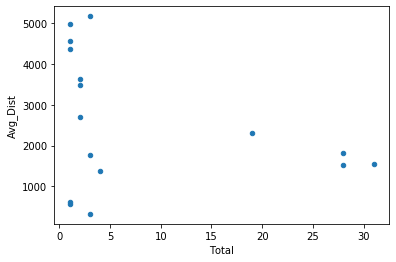

In [43]:
summarydf.plot(kind = 'scatter', x = 'Total', y = 'Avg_Dist')

It can be inferred from above that the clustering of the establishments in the four zip codes (viz. 30303, 30308, 30309 and 30318) arise from an optimum average distance to campus and hence their popularity.

In [44]:
df.head()

name           categories   cuisine  \
0                Cafe Xpress  American Restaurant  American   
1            Vibe Restaurant  American Restaurant  American   
2         Simon's Restaurant  American Restaurant  American   
3  Truth Restaurant & Lounge  American Restaurant  American   
4         Collage Restaurant  American Restaurant  American   

                 address        lat        lng  distance  postalCode  \
0  675 W Peachtree St NE  33.773480 -84.387198      1114       30308   
1  400 W Peachtree St NW  33.764703 -84.388364      1590       30308   
2      793 Juniper St NE  33.776149 -84.382603      1502       30308   
3   1100 Crescent Ave NE  33.785033 -84.384441      1666       30309   
4    165 Courtland St NE  33.759306 -84.383891      2319       30303   

                         id  
0  4c7f94b2a7958cfa5203912b  
1  53938464498ee0e5e0bd8fc5  
2  59b3066b791871507c821064  
3  5a8f33e5aa6c9501447d973e  
4  5786458f498e8ddd7a666d21

In [45]:
summarydf

lat        lng     Avg_Dist  Total
postalCode                                          
30308       33.772658 -84.383830  1541.709677     31
30318       33.785068 -84.409562  1527.464286     28
30309       33.785303 -84.386091  1825.750000     28
30303       33.758130 -84.386607  2317.789474     19
30313       33.765892 -84.394457  1382.000000      4
30332       33.775043 -84.399277   324.000000      3
30363       33.791586 -84.399646  1770.000000      3
30324       33.810764 -84.361743  5177.666667      3
30314       33.754291 -84.411748  2706.500000      2
30312       33.750883 -84.377045  3496.000000      2
30306       33.785468 -84.361591  3632.000000      2
30301       33.771016 -84.398124   562.000000      1
30066       33.775111 -84.405378   613.000000      1
30315       33.736729 -84.395640  4385.000000      1
30071       33.816470 -84.389963  4575.000000      1
30305       33.818412 -84.381156  4993.000000      1

## Specific Analysis: Shortlisted neighborhoods

We shall now explore in depth, the four most popular zip codes to set up a restaurant near GT.

In [46]:
shortlist = df[df.postalCode.isin(list(summarydf.index)[0:4])]
shortlist.head()

name           categories   cuisine  \
0                Cafe Xpress  American Restaurant  American   
1            Vibe Restaurant  American Restaurant  American   
2         Simon's Restaurant  American Restaurant  American   
3  Truth Restaurant & Lounge  American Restaurant  American   
4         Collage Restaurant  American Restaurant  American   

                 address        lat        lng  distance  postalCode  \
0  675 W Peachtree St NE  33.773480 -84.387198      1114       30308   
1  400 W Peachtree St NW  33.764703 -84.388364      1590       30308   
2      793 Juniper St NE  33.776149 -84.382603      1502       30308   
3   1100 Crescent Ave NE  33.785033 -84.384441      1666       30309   
4    165 Courtland St NE  33.759306 -84.383891      2319       30303   

                         id  
0  4c7f94b2a7958cfa5203912b  
1  53938464498ee0e5e0bd8fc5  
2  59b3066b791871507c821064  
3  5a8f33e5aa6c9501447d973e  
4  5786458f498e8ddd7a666d21

In [47]:
shortlist.shape

(106, 9)

In [48]:
# one hot encoding
shortlist_onehot = pd.get_dummies(shortlist[['cuisine']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
shortlist_onehot['postalCode'] = shortlist['postalCode'] 

# move neighborhood column to the first column
fixed_columns = [shortlist_onehot.columns[-1]] + list(shortlist_onehot.columns[:-1])
shortlist_onehot = shortlist_onehot[fixed_columns]

#group shorlist_onehot
shortlist_grouped = shortlist_onehot.groupby('postalCode').sum().reset_index()
shortlist_grouped

postalCode  American  Asian  Chinese  Cuban  Ethiopian  Fast Food  Indian  \
0       30303         9      0        1      0          0          0       0   
1       30308         5      1        0      1          1          0       0   
2       30309         8      0        0      0          0          0       2   
3       30318         5      1        0      0          0          1       0   

   Italian  Japanese  Korean  Mediterranean  Mexican  Spanish  Vietnamese  
0        0         1       1              2        1        0           0  
1        3         0       0              1        1        1           0  
2        2         1       0              2        1        0           1  
3        2         1       0              0        2        2           1

The most popular cuisine in each of these zip codes is American. Closely followed by Italian places. As a spread of various Asian cuisines are present, and also because we are interested in establishing an Indian restaurant in this venue, it is worthwhile to visualize the spread of Pan-Asian Cuisines around GT.

In [49]:
panasian = shortlist[shortlist.cuisine.isin(['Asian', 'Chinese', 'Indian', 'Japanese', 'Korean', 'Vietnamese'])]
panasian.reset_index(inplace=True)
panasian = panasian.drop('index', axis = 1)
panasian

name             categories     cuisine  \
0                        Food Terminal       Asian Restaurant       Asian   
1                        Poor Calvin's       Asian Restaurant       Asian   
2              Ginseng Chinese Cafe II     Chinese Restaurant     Chinese   
3   Touch of India Tandoori Restaurant      Indian Restaurant      Indian   
4                                Tabla      Indian Restaurant      Indian   
5             Tokyo Shapiro Restaurant    Japanese Restaurant    Japanese   
6                             Momonoki    Japanese Restaurant    Japanese   
7           Wagaya Japanese Restaurant    Japanese Restaurant    Japanese   
8                         Blossom Tree      Korean Restaurant      Korean   
9            Dua Vietnamese Restaurant  Vietnamese Restaurant  Vietnamese   
10                              Le Fat  Vietnamese Restaurant  Vietnamese   

                        address        lat        lng  distance  postalCode  \
0                Marietta St NW  33.778796 -84.410020      1079       30318   
1          510 Piedmont Ave. NE  33.768400 -84.382260      1753       30308   
2                52 Broad St NW  33.755657 -84.389560      2425       30303   
3          1037 Peachtree St NE  33.782870 -84.383870      1580       30309   
4                 77 12th St NE  33.784531 -84.385067      1587       30309   
5   303 Peachtree Center Ave NE  33.762536 -84.386027      1914       30303   
6             95 8th St NW #100  33.779626 -84.390357       881       30309   
7                339 14th St NW  33.786332 -84.398216      1147       30318   
8            64 Peachtree St NW  33.755496 -84.389006      2460       30303   
9                77 12th Street  33.784350 -84.384584      1611       30309   
10     935 Marietta St NW Ste A  33.778169 -84.409113       979       30318   

                          id  
0   5dc2f74fe3fdc2000878f863  
1   50a570e38aca7f0bfeca898c  
2   4b1e9ac0f964a5206b1c24e3  
3   4f32a11c19836c91c7ea6285  
4   52a9281311d23c836a98b9b6  
5   4f4379c519834bc91f571674  
6   5b27d937b3c961002c2af37c  
7   5537c80a498ebadbfca9dfda  
8   4d920f119d0f721e6b692473  
9   5ba91ede029a55003928d9c5  
10  5398bbb9498ea14ee535bd8f

In [50]:
zipurl = 'https://opendata.arcgis.com/datasets/fdb1a313470748e6b59e6ed718f00389_0.geojson'
resultszip = requests.get(zipurl).json()
resultszip

{'type': 'FeatureCollection',
 'name': '2580ad45-ee45-44e7-9082-72b5b21e6980202046-1-2pm5ba.yr8ps',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1,
    'ZipCode': '30304',
    'FeatureID': 'LZC0000155',
    'PrefCity': 'Atlanta',
    'SHAPESTArea': 874668.1716308594,
    'SHAPESTLength': 3578.0798963361294},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-84.39107888250156, 33.65077449660247],
      [-84.39004088994052, 33.6515082393871],
      [-84.38968718691149, 33.65208167280279],
      [-84.39047643778441, 33.65318331154098],
      [-84.39140264992533, 33.65331951916563],
      [-84.39199860990753, 33.653265400872996],
      [-84.39251811187476, 33.65307353156944],
      [-84.39303738938062, 33.65279680796096],
      [-84.39364499692608, 33.65235021225172],
      [-84.39393558317836, 33.65195723023235],
      [-84.39302084641218, 33.651322505253525],
      [-84.3922827

In [51]:
map_gt2 = folium.Map(location=[latitude, longitude], zoom_start=14)

folium.GeoJson(resultszip).add_to(map_gt2)

venues2 = plugins.MarkerCluster().add_to(map_gt2)

for lat, lng, label, in zip(panasian['lat'], panasian['lng'], panasian['name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(venues2)
    
# display map
map_gt2

In [52]:
indian = shortlist[shortlist.cuisine == 'Indian']
indian

name         categories cuisine  \
63  Touch of India Tandoori Restaurant  Indian Restaurant  Indian   
74                               Tabla  Indian Restaurant  Indian   

                 address        lat        lng  distance  postalCode  \
63  1037 Peachtree St NE  33.782870 -84.383870      1580       30309   
74         77 12th St NE  33.784531 -84.385067      1587       30309   

                          id  
63  4f32a11c19836c91c7ea6285  
74  52a9281311d23c836a98b9b6

In [53]:
map_gt3 = folium.Map(location=[latitude, longitude], zoom_start=14)

folium.GeoJson(resultszip).add_to(map_gt3)

venues3 = plugins.MarkerCluster().add_to(map_gt3)

for lat, lng, label, in zip(indian['lat'], indian['lng'], indian['name']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(venues3)
    
# display map
map_gt3

In [ ]:


# zipcode_data = results2['features']
# zipcode_data[0]
# #world_geo = r'world_countries.json'

# # create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
# # threshold_scale = np.linspace(df_can['Total'].min(),
# #                               df_can['Total'].max(),
# #                               6, dtype=int)
# # threshold_scale = threshold_scale.tolist() # change the numpy array to a list
# # threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration
# map_gt2 = folium.Map(location=[latitude, longitude], zoom_start=14)

# # let Folium determine the scale.

# folium.GeoJson(results2).add_to(map_gt2)

# map_gt2